<a href="https://colab.research.google.com/github/kiakass/share/blob/master/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%ED%91%9C%EC%A4%80%EC%9A%94%EA%B8%88_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EA%B3%B5%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지/모듈 Import

In [ ]:
# data 전처리
import numpy as np
import pandas as pd

# Model package.module import
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

## Data 전처리

In [ ]:
# 학습 Data input
url = 'https://raw.githubusercontent.com/kiakass/share/master/logistics_cost.csv'
df= pd.read_csv(url)

# X(변수), Y(Target)
X=df.loc[:,['ton','dist']]
Y=df.loc[:,['cost']]

In [ ]:
df.head()

,ton,dist,cost
0,1.0,5,2.5
1,1.0,10,3.0
2,1.0,20,4.0
3,1.0,30,5.0
4,1.0,50,6.0


In [ ]:
# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1 )

In [ ]:
pd.concat([X_train,Y_train], axis=1).head()

,ton,dist,cost
132,9.5,250,27.0
123,9.5,30,13.0
127,9.5,110,19.0
14,1.0,350,19.0
182,25.0,20,20.0


## 모델링 수행

In [ ]:
# model 구성
model = Sequential()
model.add(Dense(2,input_dim=2, activation='linear'))
model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))
#model compile
model.compile(loss='mse', optimizer='adam') # adam , rmsprop = RMSprop(lr=0.01)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 dense_14 (Dense)            (None, 3)                 9         
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습 수행
batch_size = 20
epochs = 5000

# Early Stop : patience #n 회 이상 val_loss 가 변화가 없으면 중단
es = EarlyStopping(monitor='val_loss', patience=50, min_delta=0.001)

# model fit
#history = model.fit(X_train_std, Y_train_std, batch_size=batch_size, epochs=epochs, validation_data=(X_test_std, Y_test_std), callbacks=[es])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), callbacks=[es])

Epoch 1/5000
8/8 [==============================] - 0s 14ms/step - loss: 14.3574 - val_loss: 23.8269
Epoch 2/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.2203 - val_loss: 24.4859
Epoch 3/5000
8/8 [==============================] - 0s 8ms/step - loss: 14.4659 - val_loss: 24.9601
Epoch 4/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.2225 - val_loss: 24.0419
Epoch 5/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.4249 - val_loss: 24.5507
Epoch 6/5000
8/8 [==============================] - 0s 9ms/step - loss: 14.2918 - val_loss: 23.8628
Epoch 7/5000
8/8 [==============================] - 0s 8ms/step - loss: 14.1678 - val_loss: 24.2499
Epoch 8/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.3901 - val_loss: 25.2234
Epoch 9/5000
8/8 [==============================] - 0s 8ms/step - loss: 14.2442 - val_loss: 23.7629
Epoch 10/5000
8/8 [==============================] - 0s 8ms/step - loss: 14.1710 - val_loss: 23.905

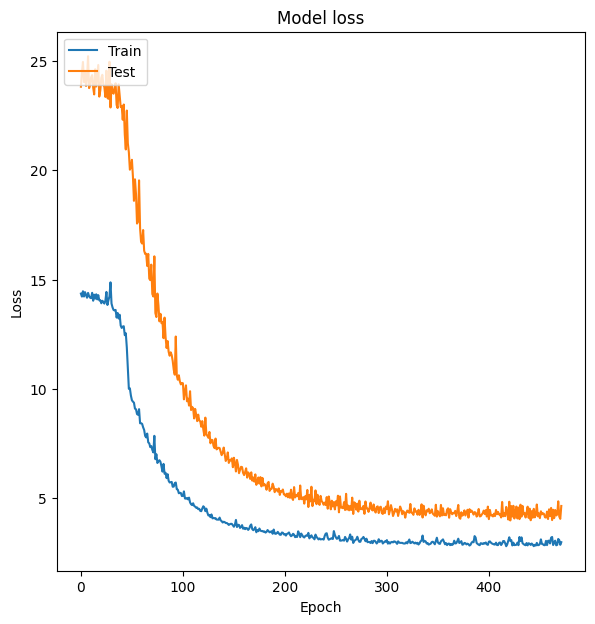

In [ ]:
# 학습 결과 시각화 : Train, Test set 검증
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다.

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1.4)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#모델 평가
loss_and_metrics = model.evaluate(X_test,  Y_test, batch_size=1000 ,verbose=2)

1/1 - 0s - loss: 4.6369 - 21ms/epoch - 21ms/step


## 모델링 결과확인

In [ ]:
# Test 데이터로 실제값과 예측값 비교
Y_pre=pd.DataFrame([]);Z_pre=pd.DataFrame([]) #초기화

predict=model.predict(X_test[:20])
Y_pre=pd.DataFrame(Y_test[:20]).reset_index(drop=True)
Z_pre['predict']=pd.DataFrame(predict).reset_index(drop=True)
pd.concat([X_test[:20].reset_index(drop=True),Y_pre,Z_pre],axis=1).round()

1/1 [==============================] - 0s 20ms/step


,ton,dist,cost,predict
0,5.0,200,21.0,21.0
1,1.0,350,20.0,22.0
2,8.0,70,14.0,15.0
3,25.0,5,18.0,17.0
4,5.0,130,16.0,17.0
5,8.0,20,11.0,10.0
6,2.0,550,35.0,34.0
7,1.0,600,31.0,35.0
8,5.0,150,17.0,18.0
9,1.0,50,6.0,6.0


## 예측 수행

In [ ]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('logistics_suggest_cost_240426.h5')
#model = load_model('logistics_suggest_cost_240426.h5')

NameError: name 'model' is not defined

In [ ]:
# 실제 예측 (input : 톤수, 거리 )
Y_pre=pd.DataFrame([]);Z_pre=pd.DataFrame([]) #초기화
# input
X_input = np.array([[1,5],[1,10],[1,20],[1,30],[1,50],[1,70],[1,90],
                    [5,5],[5,10],[5,20],[5,30],[5,50],[5,70],[5,90], [5,100], [5,110] ])
X1=pd.DataFrame(X_input,columns=('ton','dist')) # 톤수,거리 변경하여 실행
# predict
predict=model.predict(X1)
Z_pre['predict']=pd.DataFrame(predict).reset_index(drop=True)
# 출력
pd.concat([X1,Z_pre], axis=1).round()

In [ ]:
#X1=pd.DataFrame(np.array([[5, 35],[6,20]]),columns=('ton','dist'));X1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')